Gradient descent
---

Exercise - Fit a linear regression with OLS
---

> **Exercise**: Load the train and test sets. Fit a linear regression using OLS with the `LinearRegression` object from Scikit-learn. Compute the train and test RMSE scores.

In [113]:
import pandas as pd
import os

# Load train/test data
df_tr = pd.read_csv(os.path.join('data','bike-train.csv'))
df_te = pd.read_csv(os.path.join('data','bike-test.csv'))

df_tr.head(1)

,temp,temp_C,hum,windspeed,atemp,atemp_C,yr,workingday,holiday,casual
0,0.368,9.296,0.569,0.148,0.379,9.014,1,1,0,1603


In [114]:
# Implement RMSE
# Root Mean of Square Errors

import numpy as np

def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [115]:
# Build X1 and y matrix
def getX1andY(df,target_name):
    """
    Returns X1 matrix (X feature matrix with additionnal column of ones) and y vector
    Expect dataframe as first parameters, and column name of target values
    as second parameter
    """
    X = df.drop(target_name,axis=1).values
    y = df[target_name].values
    X1 = np.c_[np.ones(X.shape[0]),X]
    return (X,X1,y)

Linear regression (OLS) - train RMSE: 397.42
Linear regression (OLS) - test RMSE: 388.67


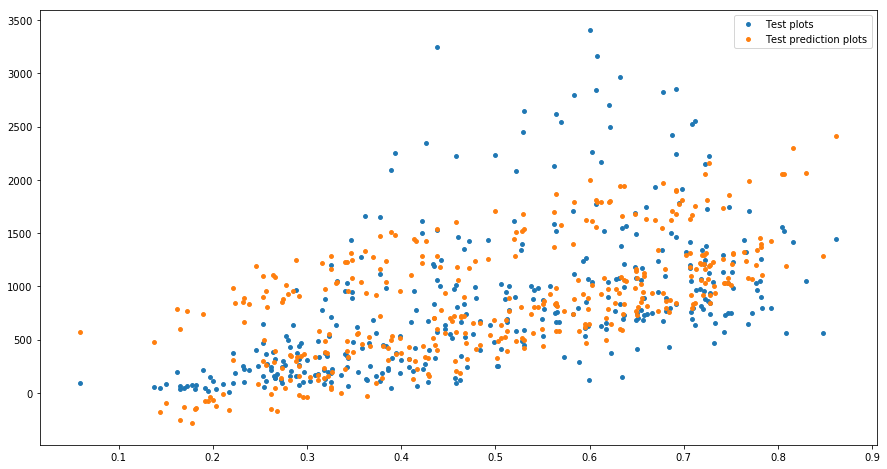

In [116]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression using OLS
X_tr, X1_tr, y_tr = getX1andY(df_tr,'casual')
X_te, X1_te, y_te = getX1andY(df_te,'casual')

lr_tr = LinearRegression()
lr_tr.fit(X_tr,y_tr)

y_pred_tr = lr_tr.predict(X_tr)
y_pred_te = lr_tr.predict(X_te)


# Evaluate model
lr_rmse_tr = rmse(y_tr,y_pred_tr) # RMSE on train set
lr_rmse_te = rmse(y_te,y_pred_te) # RMSE on test set

print('Linear regression (OLS) - train RMSE: {:.2f}'.format(lr_rmse_tr))
print('Linear regression (OLS) - test RMSE: {:.2f}'.format(lr_rmse_te))

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,8))
# plt.scatter(df_tr.temp.values,y_tr,label='Train plots', s=15)
plt.scatter(df_te.temp.values,y_te,label='Test plots', s=15)

# plt.scatter(df_tr.temp.values,y_pred_tr,label='Train prediction plots', s=15)
plt.scatter(df_te.temp.values,y_pred_te,label='Test prediction plots', s=15)

plt.legend()
plt.show()


Exercise - Fit a linear regression with gradient descent
---

> **Exercise**: Standardize the features using the train data, i.e., train mean and standard deviation. Fit a linear regression to the train data with gradient descent and evaluate its performance on the test data.

**Hint**: Test different different learning rates, e.g., 0.01, 0.1, 0.5

In [133]:
# Standardize features using train mean and standard deviation

X_tr_stand = (X_tr - X_tr.mean(axis=0))/X_tr.std(axis=0)
X_te_stand = (X_te - X_tr.mean(axis=0))/X_tr.std(axis=0)

# Add column of ones
X_tr_stand1 = np.c_[np.ones(X_tr_stand.shape[0]), X_tr_stand]
X_te_stand1 = np.c_[np.ones(X_te_stand.shape[0]), X_te_stand]


pd.DataFrame(X1_tr_scaled).describe()



,0,1,2,3,4,5,6
count,365.0,3.650000e+02,3.650000e+02,3.650000e+02,3.650000e+02,3.650000e+02,3.650000e+02
mean,1.0,-1.946692e-17,-2.652368e-16,3.990719e-16,5.110068e-17,-2.433366e-18,6.448419e-17
std,0.0,1.001373e+00,1.001373e+00,1.001373e+00,1.001373e+00,1.001373e+00,1.001373e+00
min,1.0,-2.137787e+00,-2.288991e+00,-1.865975e+00,-9.972640e-01,-1.512709e+00,-1.843755e-01
25%,1.0,-8.734893e-01,-8.128121e-01,-7.956019e-01,-9.972640e-01,-1.512709e+00,-1.843755e-01
50%,1.0,3.449090e-03,1.563025e-04,-1.110610e-01,-9.972640e-01,6.610657e-01,-1.843755e-01
75%,1.0,8.857675e-01,7.489429e-01,5.859261e-01,1.002743e+00,6.610657e-01,-1.843755e-01
max,1.0,1.907966e+00,2.496112e+00,2.863580e+00,1.002743e+00,6.610657e-01,5.423713e+00


Linear regression (GD) - train RMSE: 397.42
Linear regression (GD) - test RMSE: 388.47


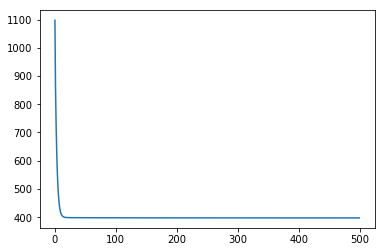

In [144]:
# Implement gradient descent
def gd(X, y, lr, n_steps):
    # Initialize vector of parameters
    w = np.zeros(X.shape[1])
    
    # Log RMSE at each step
    log_rmse = []
    
    # Perform n_steps iterations
    for step in range(n_steps):
        # Compute the predictions
        y_pred = np.matmul(X, w)

        # Update the vector of parameters
        error = y - y_pred
        
        gradient = -2*np.matmul(X.T, error)/X.shape[0]
        
        w -= lr*gradient
        
        # Log RMSE value
        log_rmse.append(rmse(y, y_pred))
        
    # Return vector of parameters and last RMSE value
    return w, log_rmse[-1], log_rmse

# Fit linear regression
w, gd_rmse_tr, log_rmse = gd(X_tr_stand1, y_tr, lr=0.1, n_steps=500)

# Evaluate model
y_te_pred = np.matmul(X_te_stand1, w)
gd_rmse_te = rmse(y_te, y_te_pred)

print('Linear regression (GD) - train RMSE: {:.2f}'.format(gd_rmse_tr))
print('Linear regression (GD) - test RMSE: {:.2f}'.format(gd_rmse_te))

plt.plot(log_rmse)
plt.show()